# Import Libraries

In [32]:
import pandas as pd
import pickle as pkl
import time
import regex as re
from collections import Counter
import numpy as np
import matplotlib.pylab as plt
import math
from scipy.signal import find_peaks

# Read Files

In [33]:
entire_books = pd.read_csv("data/final_files/entire_books.csv", low_memory=False, index_col=0).fillna("")
entire_ratings = pd.read_csv("data/final_files/entire_ratings.csv", low_memory=False, index_col=0).fillna("")
fairbook_books = pd.read_csv("data/final_files/fairbook_books.csv", low_memory=False, index_col=0).fillna("")
fairbook_ratings = pd.read_csv("data/final_files/fairbook_ratings.csv", low_memory=False, index_col=0).fillna("")

In [34]:
dfs = [entire_books, entire_ratings, fairbook_books, fairbook_ratings]

In [35]:
dfs_names = ['entire books', 'entire ratings', 'fairbook books', 'fairbook ratings']

# Analysis

## Gender

In [36]:
for df in dfs:
    df["gender"] = df["gender"].apply(lambda x: "unknown" if x=="" else x)
    df["gender"][(df.gender!="male") & (df.gender!="female") & (df.gender!="unknown")] = "other"

/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_27939/2398089042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"][(df.gender!="male") & (df.gender!="female") & (df.gender!="unknown")] = "other"
/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_27939/2398089042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"][(df.gender!="male") & (df.gender!="female") & (df.gender!="unknown")] = "other"


In [37]:
colors={'male':'#1f77b4', 
        'other':'#d62728',
       "female":"#ff7f0e",
       "unknown":"#2ca02c"}

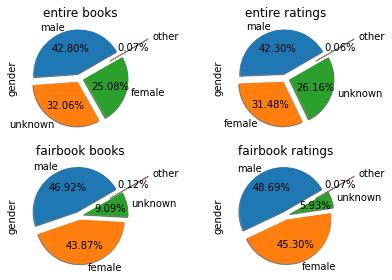

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for i in range(len(dfs)):
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    dfs[i].gender.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.1, 0.1,0.8), shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)],
                                     colors=[colors[v] for v in df['gender'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
fig.tight_layout()
#fig.suptitle("Gender Distribution")
#fig.show()

# Check if same most common 5

In [39]:
def check_most_common(column):
    most_common_5=[]
    for df in dfs:
        most_common_5.append(set([x[0] for x in Counter(df[column]).most_common()[:5]]))
    return len(np.unique(most_common_5))==1

# Country

Do all sets have the same 5 most common?

In [40]:
check_most_common("country")

False

In [41]:
for df in dfs:
    df["country"] = df["country"].apply(lambda x: "unknown" if x=="" else x)
    #df["gender"][(df.gender!="male") & (df.gender!="female") & (df.gender!="unknown")] = "other"

In [42]:
most_common_5 = [x[0] for x in Counter(fairbook_ratings.country).most_common()[:5]]

In [43]:
for df in dfs:
    df["country"][df.country.isin(most_common_5) == False] = "other"

/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_27939/1321599258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"][df.country.isin(most_common_5) == False] = "other"
/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_27939/1321599258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["country"][df.country.isin(most_common_5) == False] = "other"


In [44]:
colors={'USA':'#1f77b4', 
        'UK':'#d62728',
       "Ireland":"#8c564b",
       "unknown":"#ff7f0e",
       "Canada":"#9467bd",
       "other":"#2ca02c"}

/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_27939/2622091186.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


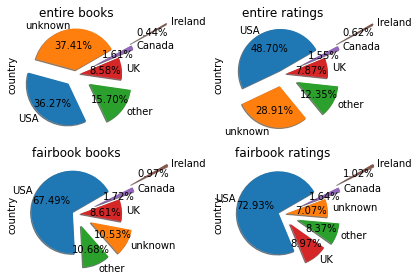

In [45]:
fig, axes = plt.subplots(nrows=2, ncols=2)
for i in range(len(dfs)):
    df = dfs[i].copy()
    df.country = df.country.replace("United States of America", "USA")
    df.country = df.country.replace("United Kingdom", "UK")
    df.country = df.country.replace("Republic of Ireland", "Ireland")
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.country.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.3, 0.4,0.1, 0.5,1.5), shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)], 
                                   colors=[colors[v] for v in df['country'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
    
fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

# Language

In [46]:
for df in dfs:
    df["language"] = df["language"].apply(lambda x: "unknown" if x=="" else x)
    #df["gender"][(df.gender!="male") & (df.gender!="female") & (df.gender!="unknown")] = "other"

Do all sets have the same 5 most common?

In [47]:
check_most_common("language")

False

In [48]:
most_common_5 = [x[0] for x in Counter(fairbook_ratings.country).most_common()[:5]]

/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_27939/1733344759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language"][df.language.isin(most_common_5) == False] = "other"
/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_27939/1733344759.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["language"][df.language.isin(most_common_5) == False] = "other"
/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_27939/1733344759.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()

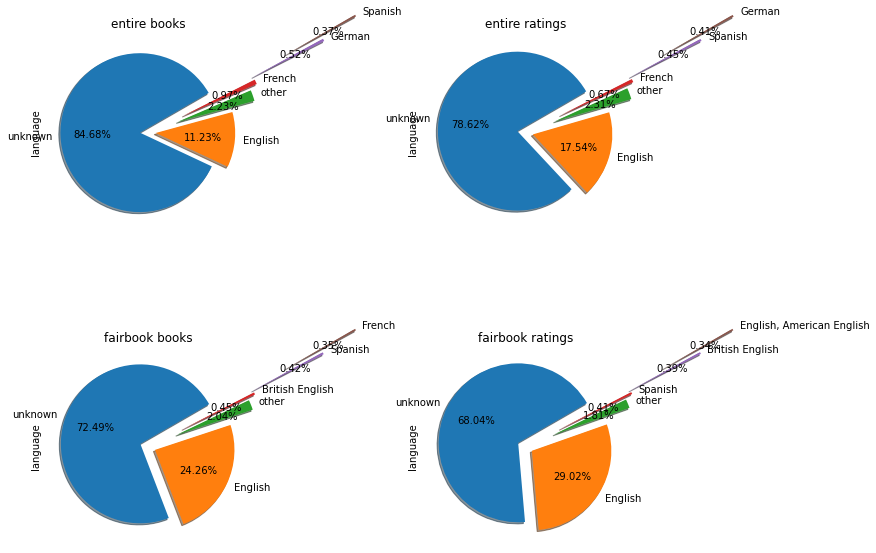

In [49]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    
    df = dfs[i].copy()
    most_common_5 = [x[0] for x in Counter(df.language).most_common()[:5]]
    df["language"][df.language.isin(most_common_5) == False] = "other"
    
    #df.country = df.country.replace("United States of America", "USA")
    #df.country = df.country.replace("United Kingdom", "UK")
    #df.country = df.country.replace("Republic of Ireland", "Ireland")
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.language.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.1, 0.4,0.5, 1.5,2), shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)])
    #, 
     #                              colors=[colors[v] for v in df['country'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
fig.show()

# Birthyear

## Distribution of the known ones

/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_27939/1570758822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.birthyear = c.birthyear.astype("float")
/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_27939/1570758822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.birthyear = c.birthyear.astype("float")
/var/folders/kh/k3tdtq_s5197cmczt3hthfc40000gn/T/ipykernel_27939/1570758822.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

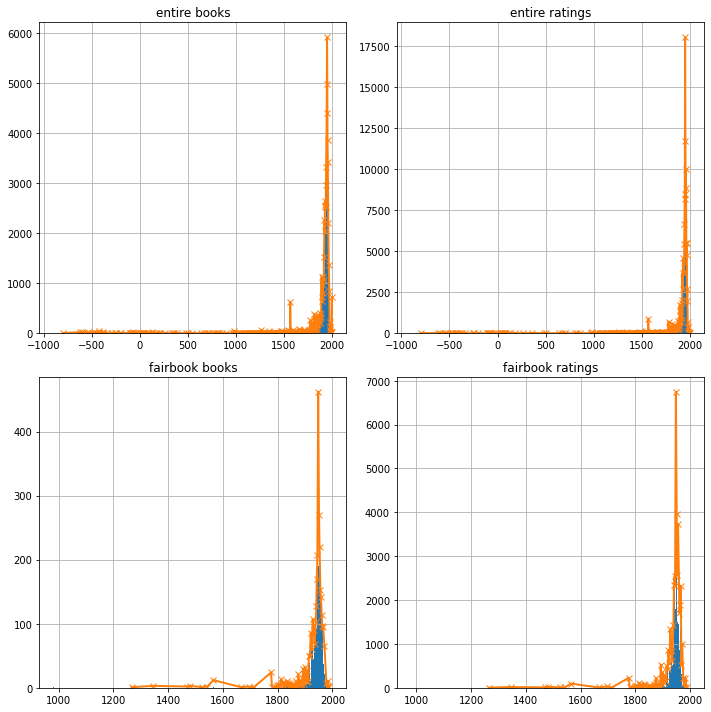

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    df = dfs[i].copy()
    c = df[df.birthyear!=""]
    c.birthyear = c.birthyear.astype("float")
    max_frequency = c['birthyear'].value_counts().max()
    #print(max_frequency)
#     print(c.birthyear.mode().iloc[0])
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    
    n = math.ceil((c.birthyear.max() - c.birthyear.min()))
#     print(n)
    c.hist(column="birthyear", bins=n,ax=axes[int(j1),int(j2)])
#     df.country.value_counts().plot(kind="pie",autopct='%.2f%%',explode=(0.1, 0.3, 0.4,0.1, 0.5,1.5), shadow=True
#                                       , startangle=30, ax=axes[int(j1),int(j2)], 
#                                    colors=[colors[v] for v in df['country'].value_counts().keys()])

    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
    
    
    hist, bin_edges = np.histogram(list(c.birthyear), int(max(c.birthyear)-min(c.birthyear)))
    bin_edges = bin_edges[1:]
    peaks, _ = find_peaks(hist)
    axes[int(j1),int(j2)].plot(bin_edges[peaks], hist[peaks],linewidth=2, marker ='x')
    
    #axes[int(j1),int(j2)].set_ylim(0,max_frequency)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.9, 
#                     hspace=0.2)    
fig.tight_layout()
fig.show()

## Distribution of all years

In [76]:
for df in dfs:
    df["birthyear_coded"] = df["birthyear"].apply(lambda x: "1000000" if x=="" else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "2000000" if int(x)<0 else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "3000000" if (int(x)>=0)&(int(x)<1900) else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "4000000" if (int(x)>=1900)&(int(x)<1950) else x)
    df["birthyear_coded"] = df["birthyear_coded"].apply(lambda x: "5000000" if (int(x)>=1950)&(int(x)<2050) else x)

In [77]:
for df in dfs:
    df.birthyear_coded = df.birthyear_coded.replace("1000000","unknown")
    df.birthyear_coded = df.birthyear_coded.replace("2000000","B.C.")
    df.birthyear_coded = df.birthyear_coded.replace("3000000","0-1900")
    df.birthyear_coded = df.birthyear_coded.replace("4000000","1900-1950")
    df.birthyear_coded = df.birthyear_coded.replace("5000000","1950-2000")

In [78]:
colors={'1900-1950':'#1f77b4', 
        '1950-2000':'#d62728',
       "unknown":"#2ca02c",
       "0-1900":"#ff7f0e",
       "B.C.":"black"}

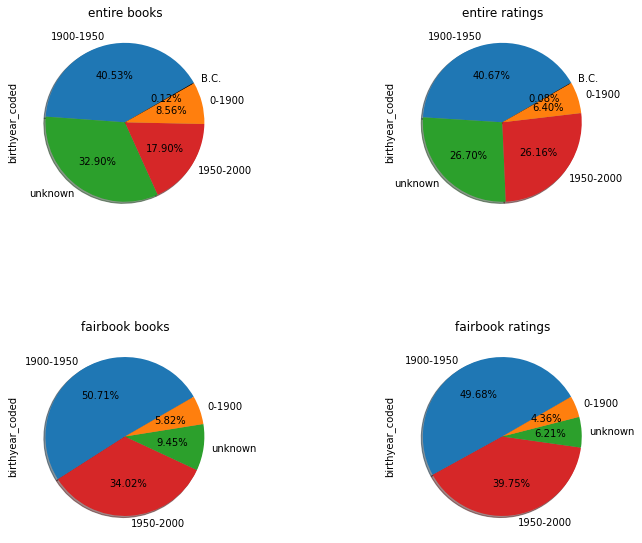

In [79]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    
    df = dfs[i].copy()
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.birthyear_coded.value_counts().plot(kind="pie",autopct='%.2f%%', shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)]
                                     ,colors=[colors[v] for v in df['birthyear_coded'].value_counts().keys()])
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
#fig.show()

In [80]:
for df in dfs:
    for index, row in df.iterrows():
        if (row.birthyear_coded == "1950-2000") | (row.birthyear_coded == "1900-1950"):
            year = row.birthyear
            year_rounded_down = math.floor(year/10)*10
            df.at[index, "birthyear_coded"] = str(year_rounded_down)+"s"

In [81]:
dfs[0].birthyear_coded.unique()

array(['unknown', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s',
       '0-1900', '1920s', '1900s', '1910s', '2000s', '1990s', 'B.C.'],
      dtype=object)

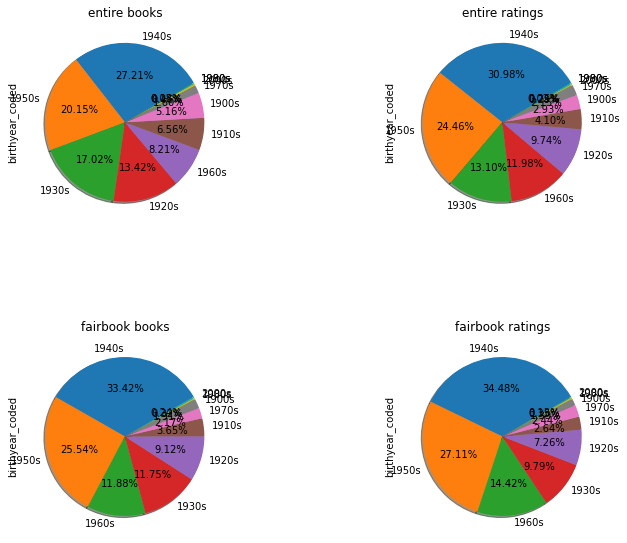

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10))
for i in range(len(dfs)):
    
    df = dfs[i].copy()
    df = df[(df.birthyear_coded!="unknown")&(df.birthyear_coded!="B.C.")&(df.birthyear_coded!="0-1900")]
    j1 = np.divide(i,2)
    j2 = np.mod(i,2)
    df.birthyear_coded.value_counts().plot(kind="pie",autopct='%.2f%%', shadow=True
                                      , startangle=30, ax=axes[int(j1),int(j2)]
                                     )
    axes[int(j1),int(j2)].tick_params(labelrotation=0)
    axes[int(j1),int(j2)].title.set_text(dfs_names[i])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.9, 
                    hspace=0.2)
#fig.tight_layout()
#fig.suptitle("Gender Distribution")
#fig.show()

In [86]:
dfs[0][dfs[0].birthyear_coded == "2000s"].birthyear.unique()

array([2000.0, 2002.0, 2004.0], dtype=object)

In [89]:
dfs[0][dfs[0].birthyear_coded == "2000s"].loc[dfs[0].birthyear==2004]

,QID,viaf_id,ISBN,sexuality,country,language,religion,gender,ethnicity,birthyear,deathyear,title,author,year,publisher,birthyear_coded
228161,Q3753446,49386774,8484601382,,other,unknown,,male,,2004.0,2013.0,LA Mente Humana,Jose Luis Pinillos,2001,Temas de Hoy,2000s
